# Question 1:

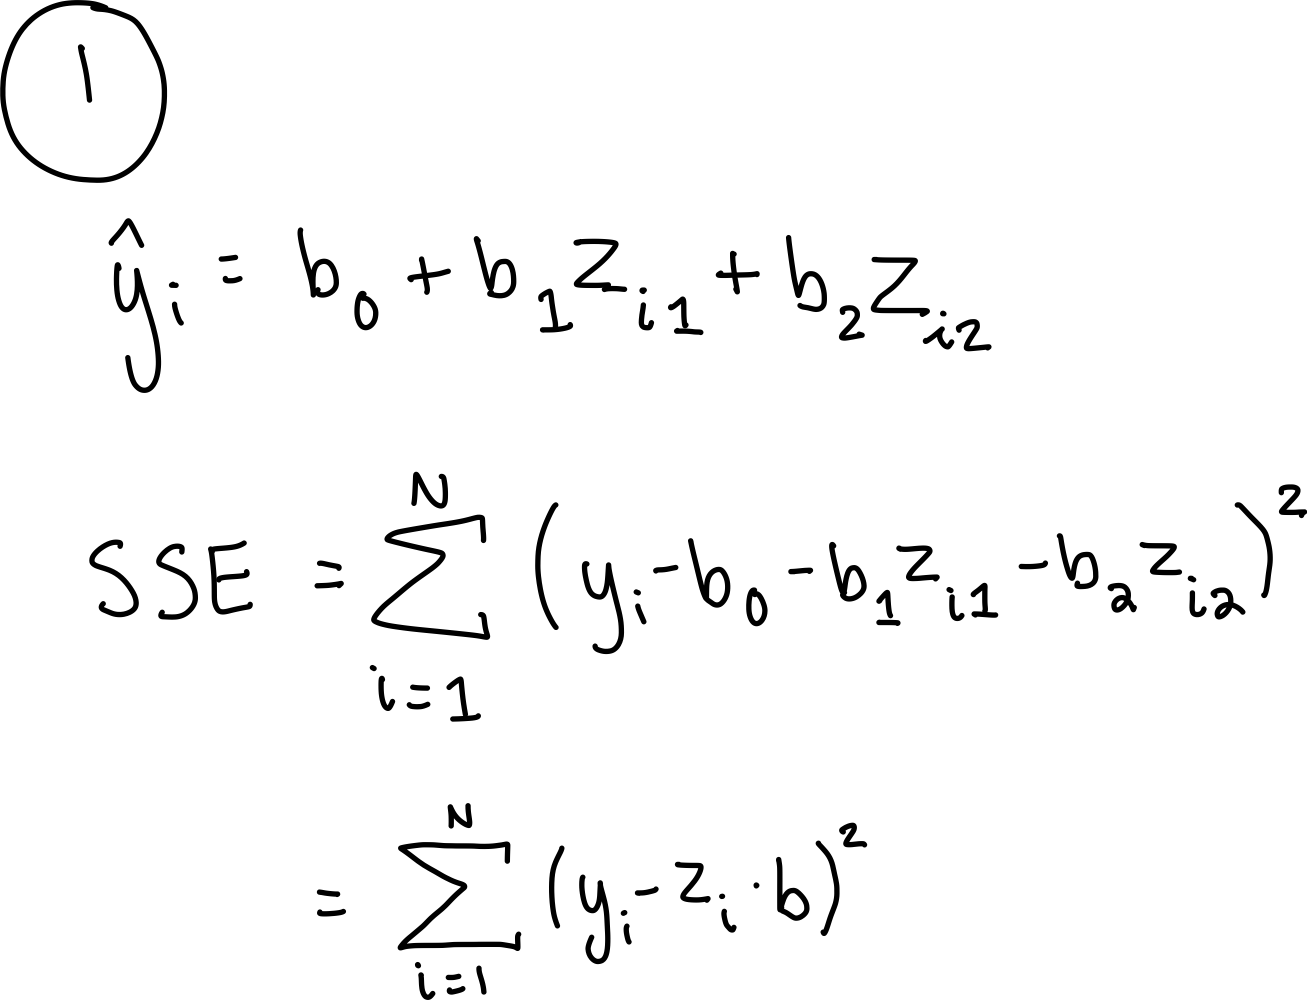

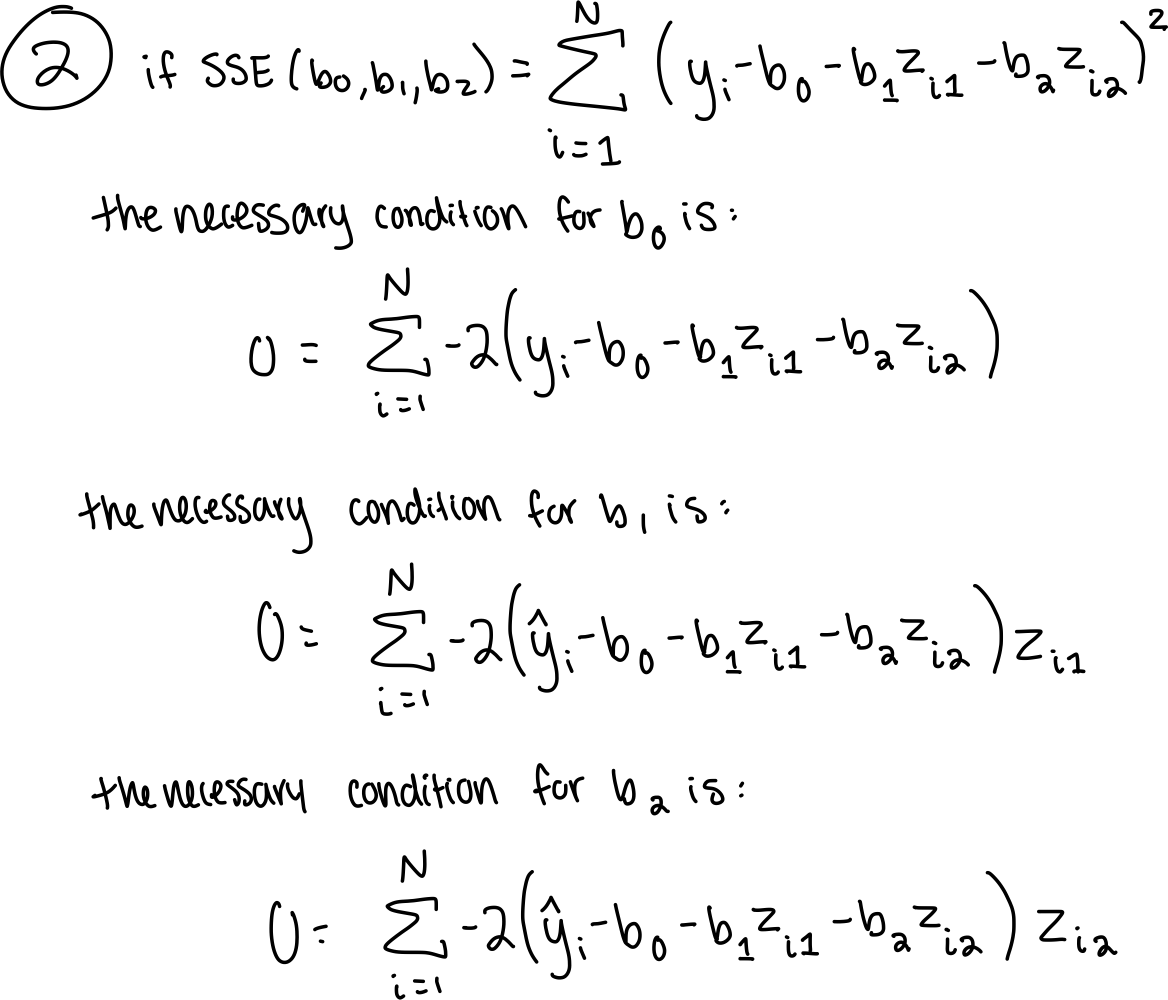

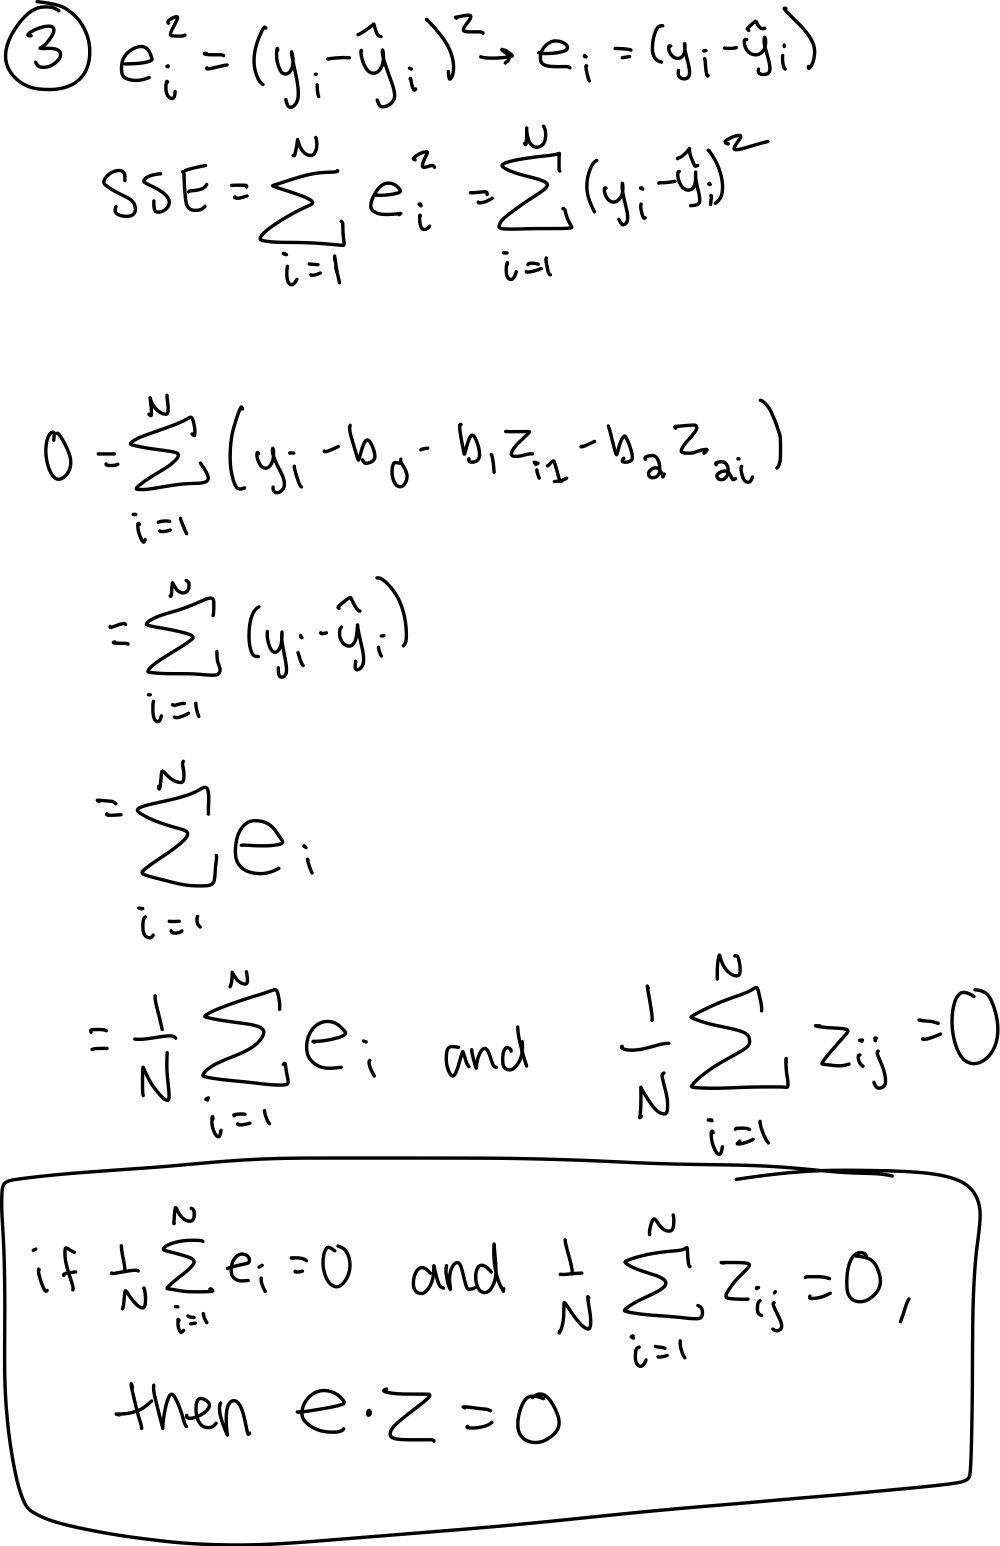

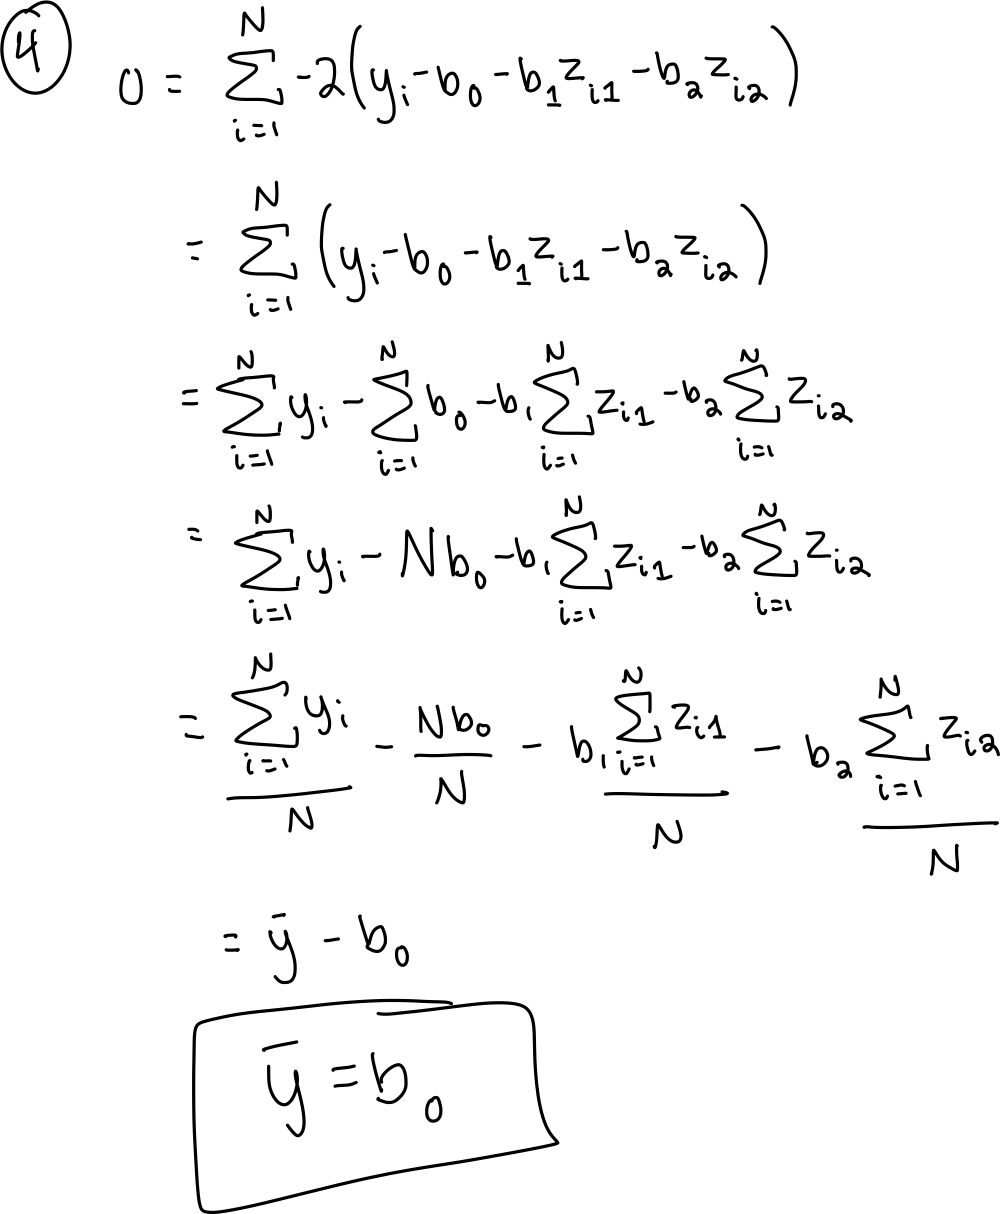

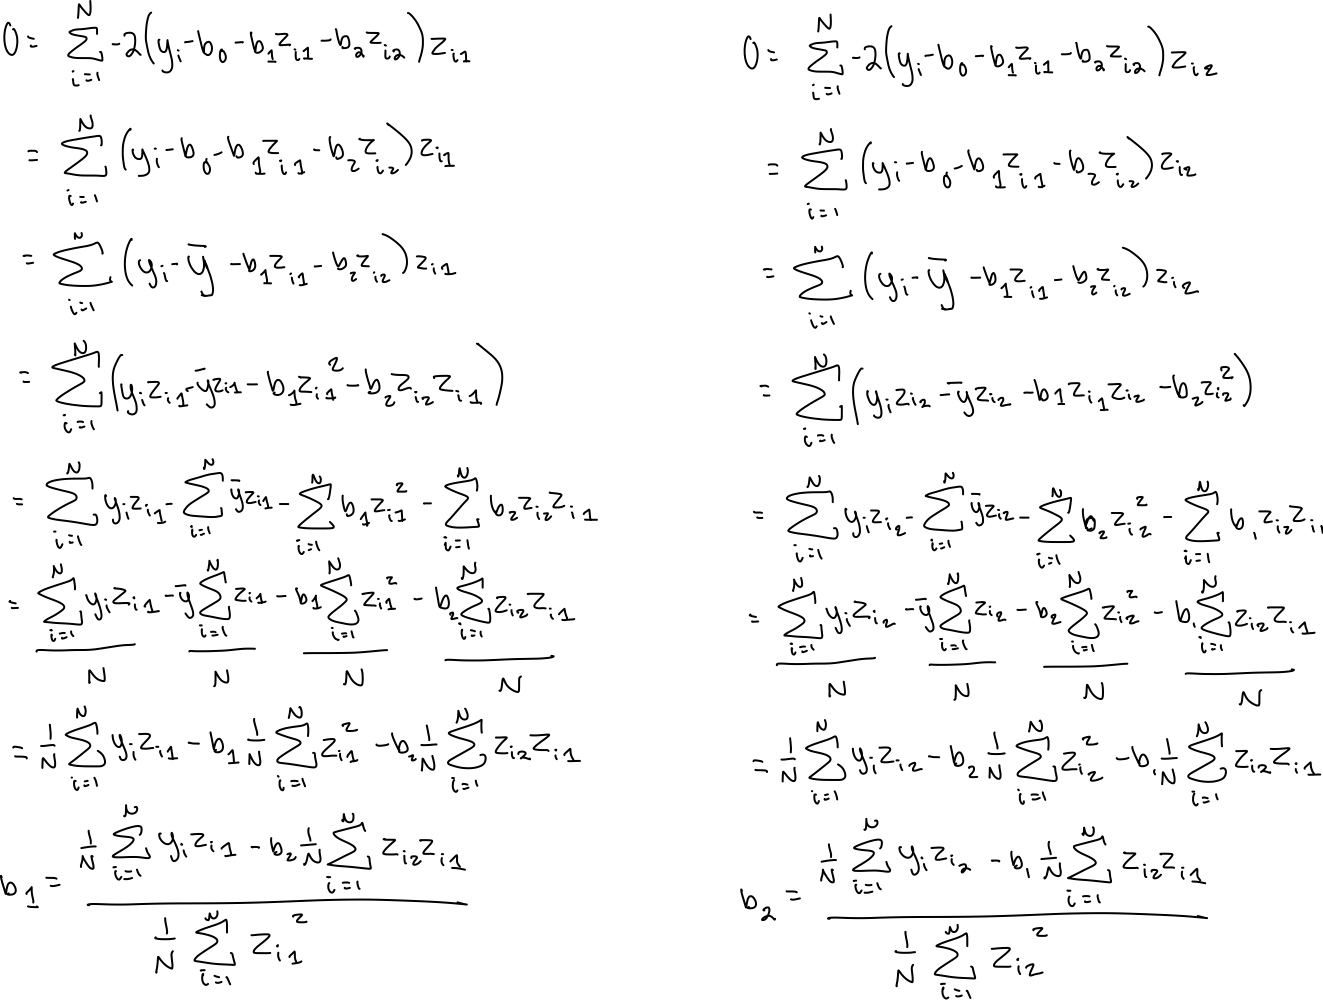

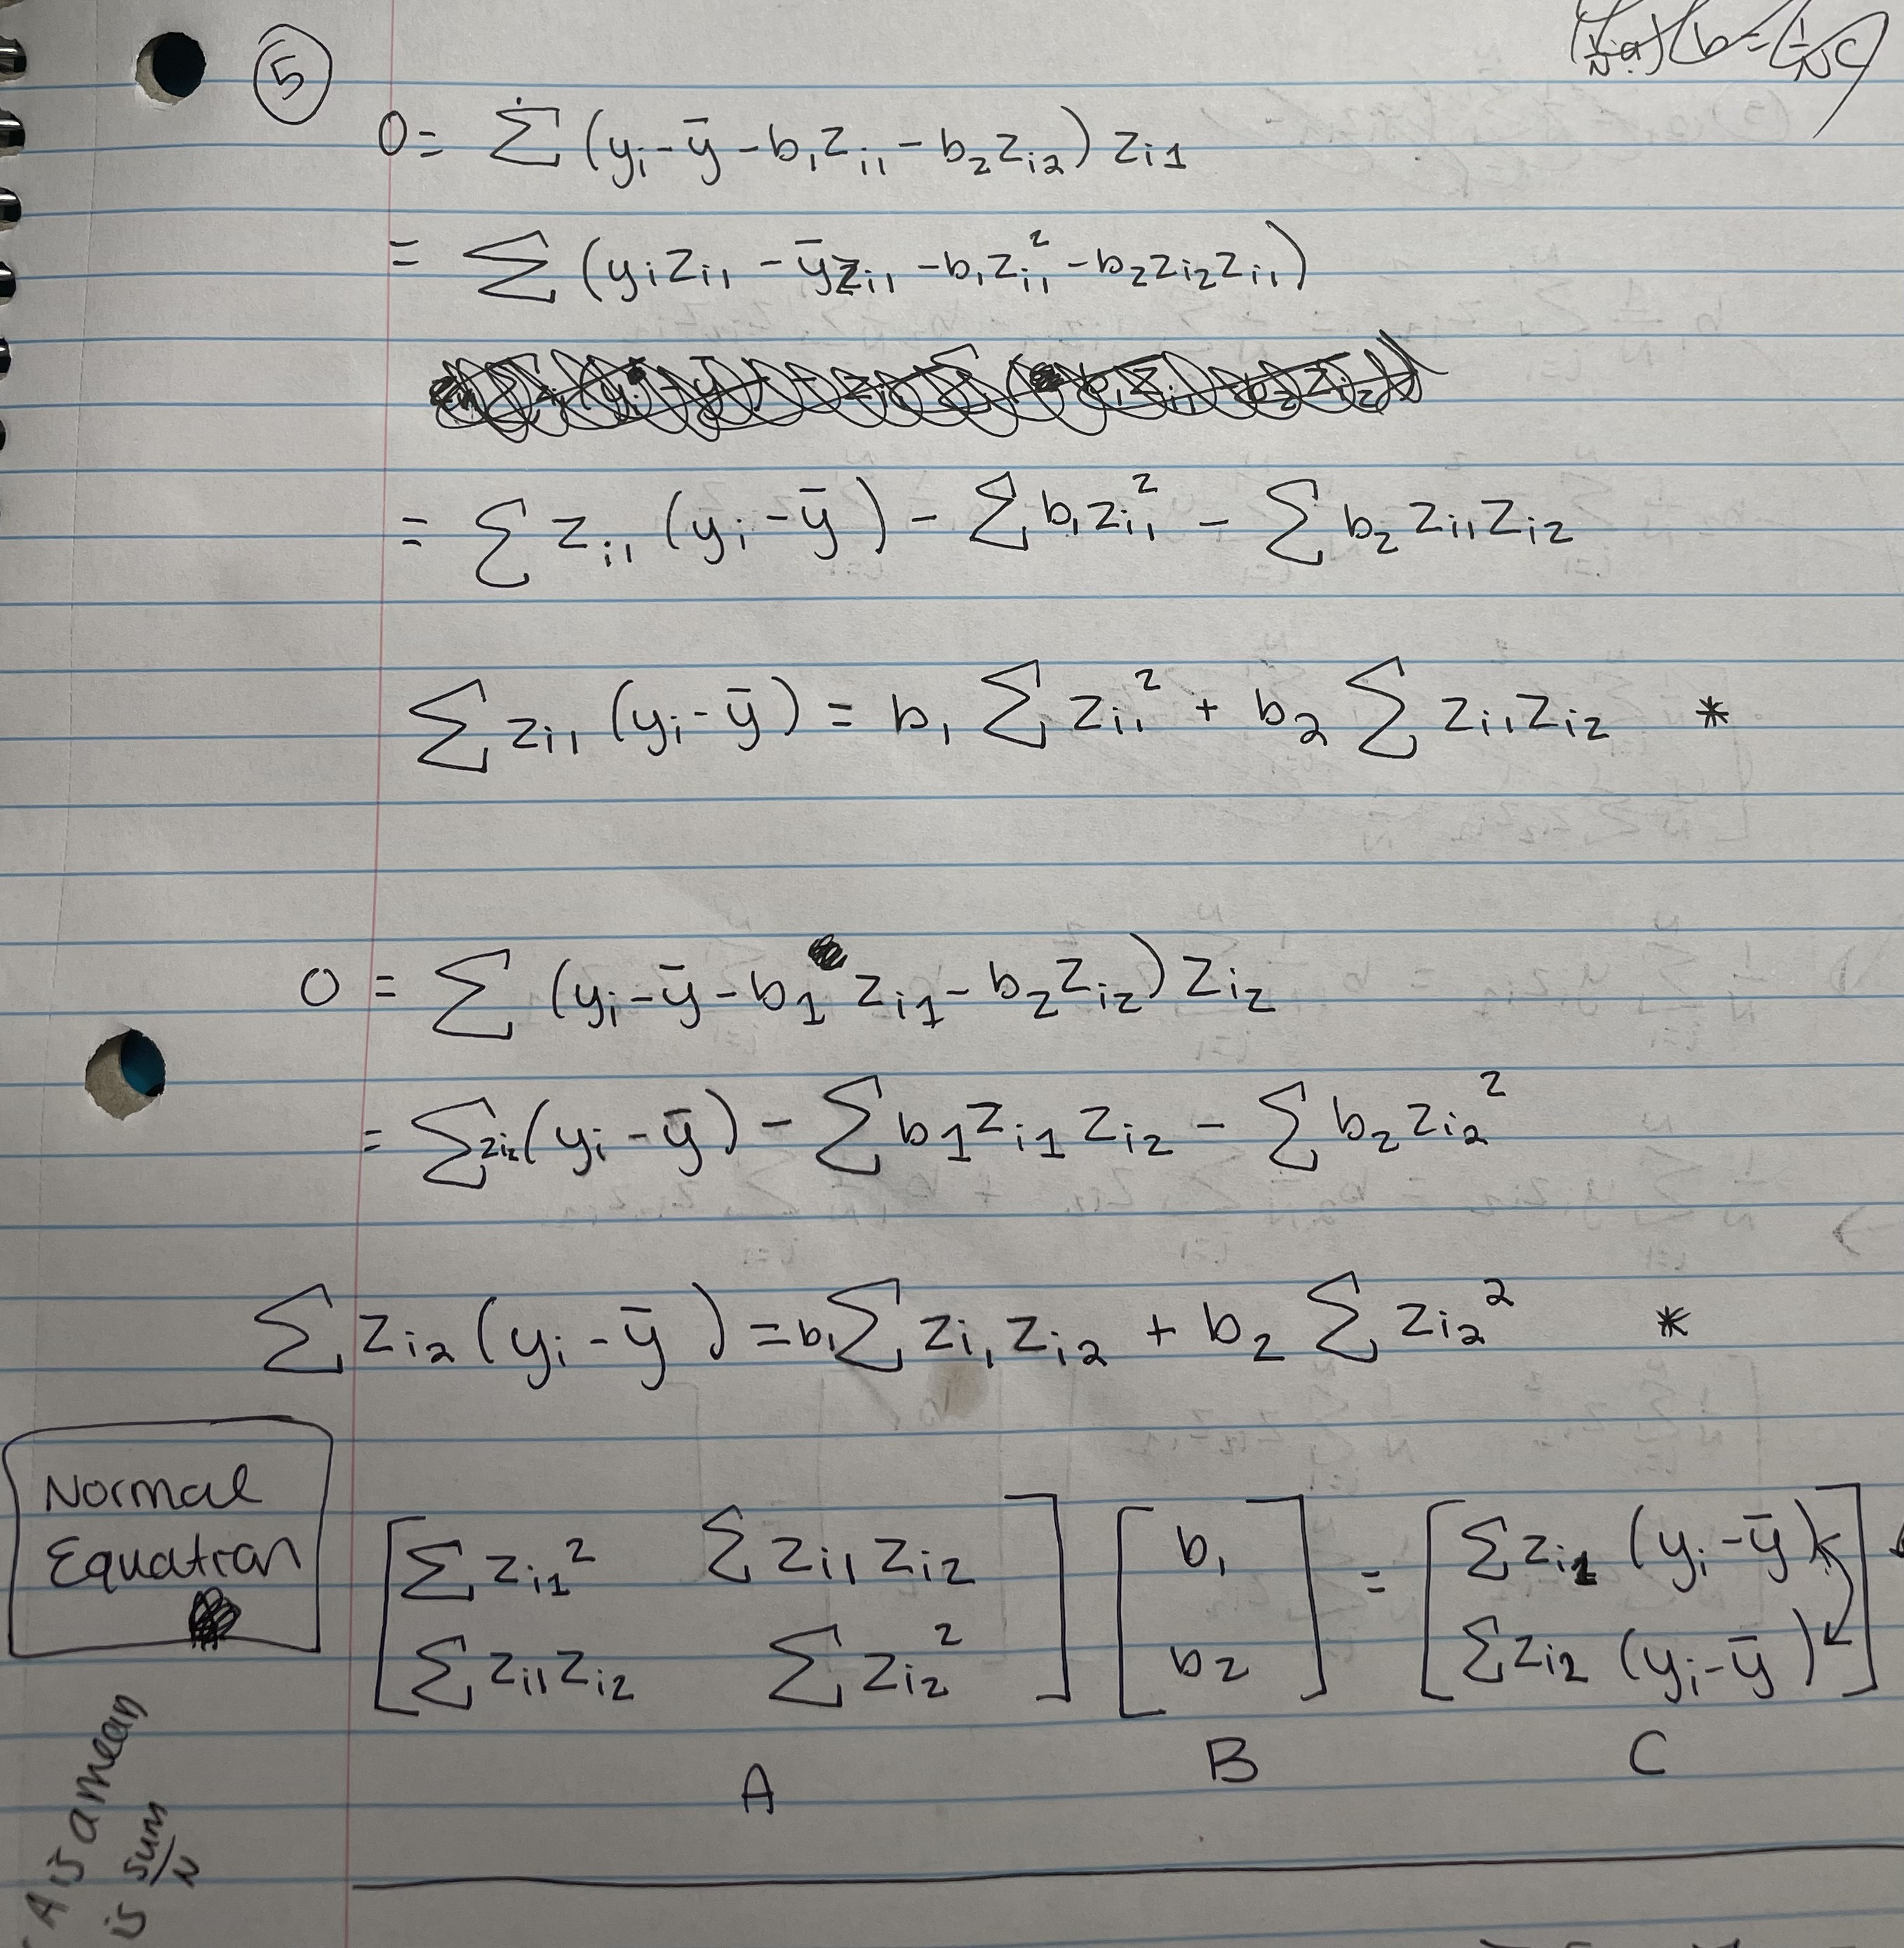

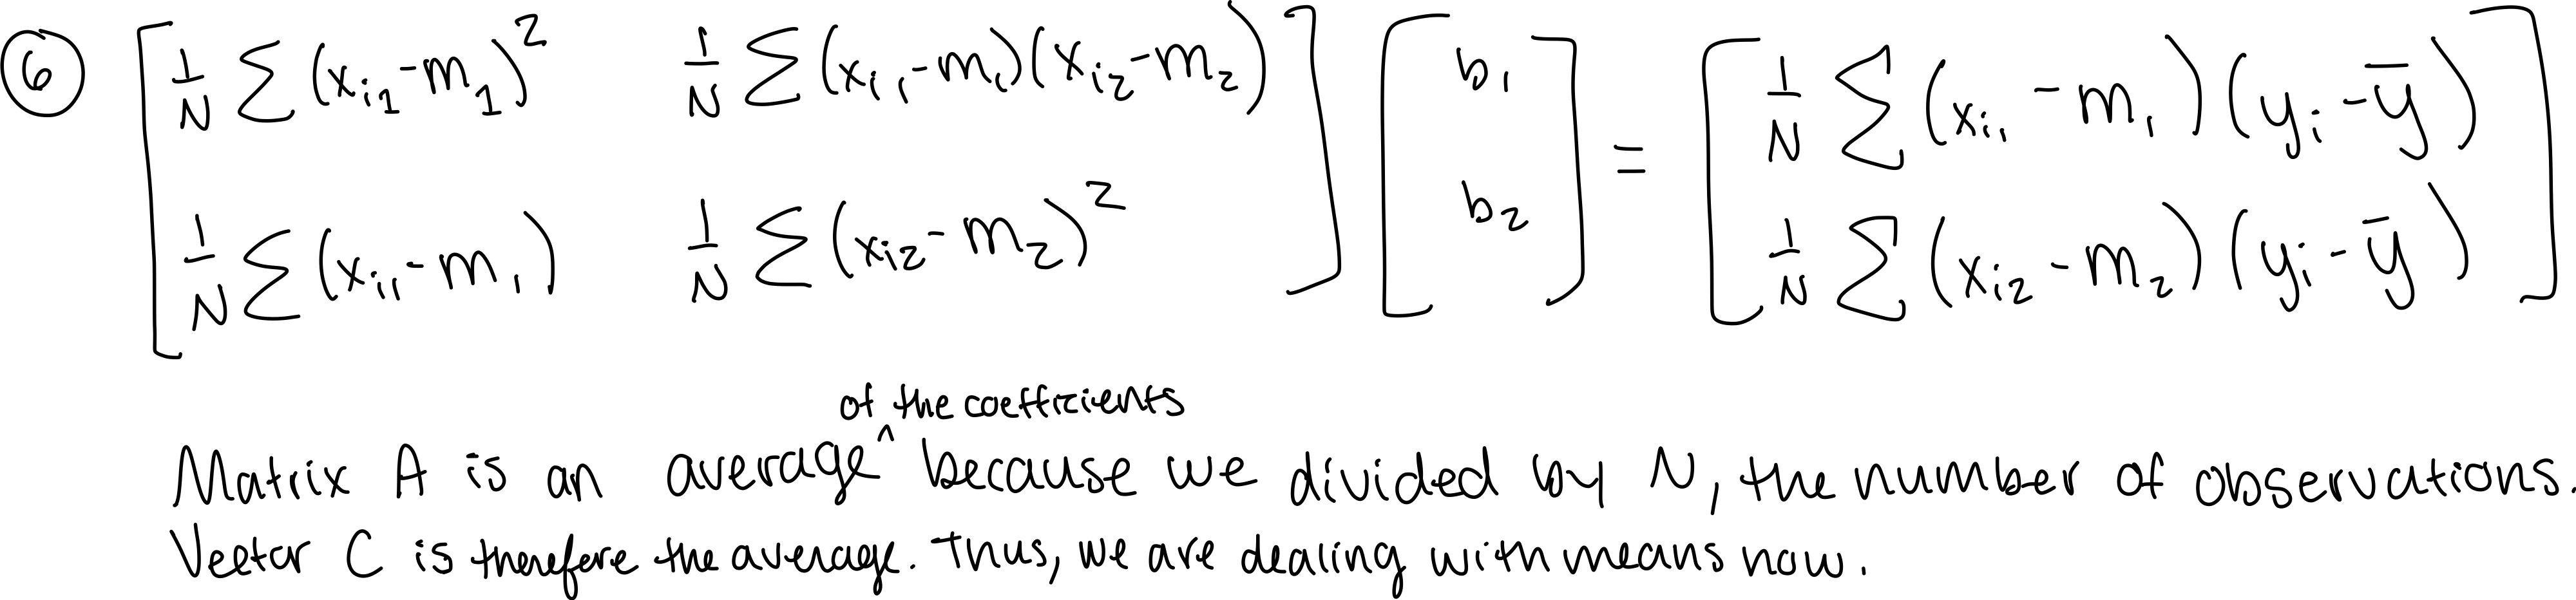

In [100]:
from IPython.display import Image, display

display(Image(filename='A6Q1.1.png', width=300))
display(Image(filename='A6Q1.2.png', width=300))
display(Image(filename='A6Q1.3.png', width=300))
display(Image(filename='A6Q1.4a.png', width=300))
display(Image(filename='A6Q1.4b.png', width=500))
display(Image(filename='A6Q1.5.jpg', width=300))
display(Image(filename='A6Q1.6.png', width=500))

# Question 3:

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df0 = pd.read_csv("data/heart_hw.csv")
df = df0
print(df.head(5))

   Unnamed: 0  age transplant  y
0           1   53    control  0
1           2   43    control  0
2           3   52    control  0
3           4   52    control  0
4           5   54    control  0


Part 1a: the proportion of people who survive in the control group who do not receive a transplant

In [51]:
# out of those who did not receive a transplant, who survived 
subset1 = df[df["transplant"]=="control"]
count1 = (df["y"] == 1).sum()
proportion1 = count2/(len(subset1))
print(proportion1)

0.8235294117647058


**Part 1b:** the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group

In [52]:
# out of those who did receive a transplant, who survived
subset2 = df[df["transplant"]=="treatment"]
count2 = (df["y"]==1).sum()
proportion2 = count2/(len(subset2))

difference = proportion1 - proportion2
print(difference)

0.41773231031543046


**Part 2:** Regress y on transplant using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.

In [53]:
# make control =0 and treatment =1 
df["transplant"]=df["transplant"].replace({"control": 0, "treatment": 1})
print(df)

     Unnamed: 0  age  transplant  y
0             1   53           0  0
1             2   43           0  0
2             3   52           0  0
3             4   52           0  0
4             5   54           0  0
..          ...  ...         ... ..
98           99   30           0  1
99          100   48           1  1
100         101   40           1  1
101         102   48           1  1
102         103   33           1  1

[103 rows x 4 columns]


C:\Users\helen\AppData\Local\Temp\ipykernel_28744\375434776.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["transplant"]=df["transplant"].replace({"control": 0, "treatment": 1})


In [54]:
x = df['transplant']
y = df['y']

def slr(x,y): 
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x-x_bar)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1})

print(slr(x,y))

{'b0': np.float64(0.11764705882352941), 'b1': np.float64(0.23017902813299232)}


Part one calculates the proportions of people who survive based on whether or not they received a transplant, while part 2 calculates the coefficients for the regression equations to explore the relationships between these variables. Part one indicates that there are differences and part 2 provides the actual coefficients to explain these differences. 

**Part 3:** We'd like to include age in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress y on a constant, transplant, and age. How does the intercept change?

In [55]:
def mlr(X,y): # Multiple linear regression, matrix algebra approach
    XpX = X.T@X # Compute X'X
    Xpy = X.T@y # Compute X'y
    b = np.linalg.solve(XpX, Xpy) # Solve normal equations
    y_hat = X@b # Compute predictions
    residuals = y-y_hat # Compute residuals
    SSE =  np.inner(residuals,residuals) # Compute SSE
    rsq = 1 - SSE/np.inner( y-np.mean(y),y-np.mean(y)) # Compute Rsq
    return({'b':b,'y_hat':y_hat,'residuals':residuals,'rsq':rsq,'SSE':SSE})

X = df.loc[:,['age','transplant'] ]
y = df['y']
reg = mlr(X,y)
print('MLR intercept: ', reg['b']) # Same values!

MLR intercept:  [0.00056016 0.32235086]


**The intercept is 0.00056** This intercept is smaller than the previously calculated intercept. This is because this model is a multiple linear regression model and takes into account both age and transplant, while the previous only looks at transplant. This clearly shows that age has a significant impact on survival rates for transplant categories. 

**Part 4:** Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.

In [68]:
df['age^2'] = df['age']**2
df['age x transplant'] = df['age'] * df['transplant']
vars = ['age', 'age^2', 'transplant', 'age x transplant']
X = df[vars]
y = df['y']
X.head()

,age,age^2,transplant,age x transplant
0,53,2809,0,0
1,43,1849,0,0
2,52,2704,0,0
3,52,2704,0,0
4,54,2916,0,0


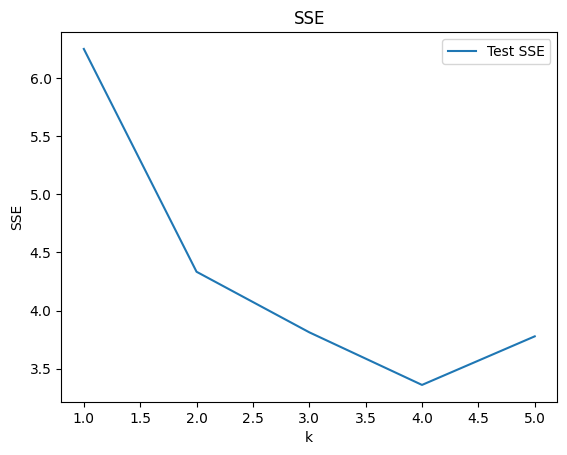

In [69]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

k_bar = [1,2,3,4,5]
SSE = [] 
SSE_on_train = []

for k in k_bar:
    model = KNeighborsRegressor(n_neighbors=k+1) 
    fitted_model = model.fit(X_train,y_train) 
    y_hat = fitted_model.predict(X_test) 
    SSE.append(np.sum( (y_test-y_hat)**2 )) 
    y_hat = fitted_model.predict(X_train)
    SSE_on_train.append(np.sum((y_train-y_hat)**2))

plt.plot(k_bar,SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

The optimal model is where k = 2

In [70]:
# the model
model = KNeighborsRegressor(n_neighbors=2) 
fitted_model = model.fit(X_train,y_train)
y_hat_train = fitted_model.predict(X_train) 
y_hat_test = fitted_model.predict(X_test) 

In [71]:
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X, y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X, y)) # R squared measure
results

R-squared:  0.18550411975863823


,variable,coefficient
0,age,0.018829
1,age^2,-0.000349
2,transplant,0.691651
3,age x transplant,-0.009906


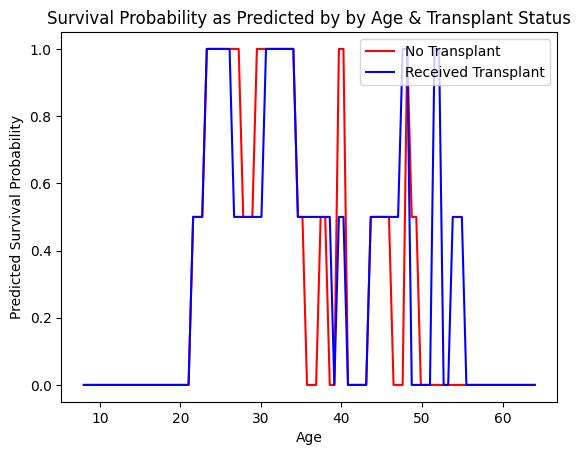

In [84]:
# used ChatGPT to help refine code for this section. 
age_seq = np.linspace(df['age'].min(), df['age'].max(), 100)

grid_no_tx = pd.DataFrame({'age': age_seq,'age^2': age_seq**2,'transplant': 0,'age x transplant': age_seq * 0})
grid_yes_tx = pd.DataFrame({'age': age_seq,'age^2': age_seq**2,'transplant': 1,'age x transplant': age_seq * 1})

y_hat_no_tx  = fitted_model.predict(grid_no_tx)
y_hat_yes_tx = fitted_model.predict(grid_yes_tx)

plt.plot(age_seq, y_hat_no_tx, label='No Transplant', color='red')
plt.plot(age_seq, y_hat_yes_tx, label='Received Transplant', color='blue')
plt.xlabel('Age')
plt.ylabel('Predicted Survival Probability')
plt.title('Survival Probability as Predicted by Age & Transplant Status')
plt.legend()
plt.show()

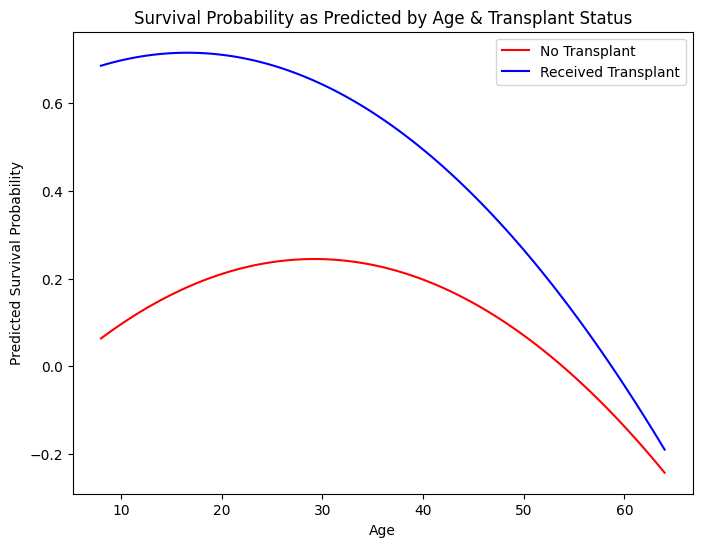

In [86]:
df['age^2'] = df['age']**2
df['age x transplant'] = df['age'] * df['transplant']

X = df[['age', 'age^2', 'transplant', 'age x transplant']]
y = df['y']


# used ChatGPT to help refine code for this section. 
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)

age_seq = np.linspace(df['age'].min(), df['age'].max(), 100)

y_hat_no_tx  = model.predict(grid_no_tx)
y_hat_yes_tx = model.predict(grid_yes_tx)

plt.figure(figsize=(8,6))
plt.plot(age_seq, y_hat_no_tx, label='No Transplant', color='red')
plt.plot(age_seq, y_hat_yes_tx, label='Received Transplant', color='blue')
plt.ylabel('Predicted Survival Probability')
plt.title('Survival Probability as Predicted by Age & Transplant Status')
plt.xlabel('Age')
plt.legend()
plt.show()

**Part 5:** Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

If these models were used to select who receives organi transplants, I would be concerned about the kind of variables in the model and whether the predictive power is sufficient. In one of the earlier questions, adding the "age" variable lowered the y intercept substantially. In this dataset, only a few variables were analyzed. However, even with these few variables, the impact of adding another predictor had a substantial enough impact. Thus, before implementing these models and using their predictive power as a determinant for who is contacted about a potential organ, researchers would need to ensure that the proper predictor variables are being used. Otherwise, there could be confounds that are leading to the relationships seen in these models that are not being addressed with the data this model was trained on. 